In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
q = pd.read_csv('chestionar11.csv')

In [3]:
qdn = pd.read_csv('chestionardn.csv')

In [4]:
q.columns

Index(['ID', 'a_zile', 'b_minute', 'c_zile', 'd_minute', 'e_zile', 'f_minute',
       'g_minute', 'ab_ore', 'cd_ore', 'ef_ore', 'g_ore'],
      dtype='object')

In [5]:
q.apply(lambda x: x.unique())

ID          [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11,...
a_zile                               [0, 2, 3, 6, 1, 4, 7, 5]
b_minute     [0.0, 30.0, 120.0, nan, 40.0, 60.0, 180.0, 50.0]
c_zile                                           [1, 2, 3, 4]
d_minute           [20.0, 30.0, 60.0, 120.0, nan, 40.0, 50.0]
e_zile                               [1, 2, 4, 6, 5, 0, 3, 7]
f_minute                    [30, 10, 40, 60, 120, 180, 0, 50]
g_minute             [480.0, 360.0, nan, 240.0, 300.0, 420.0]
ab_ore      [0.0, 1.0, 1.5, 12.0, nan, 0.5, 2.666666667, 2...
cd_ore      [0.333333333, 0.5, 1.0, 2.0, nan, 3.0, 4.0, 6....
ef_ore      [0.5, 0.166666667, 0.666666667, 2.0, 8.0, 4.0,...
g_ore                          [8.0, 6.0, nan, 4.0, 5.0, 7.0]
dtype: object

In [6]:
q.apply(lambda x: len(x.unique()))

ID          40
a_zile       8
b_minute     8
c_zile       4
d_minute     7
e_zile       8
f_minute     8
g_minute     6
ab_ore      16
cd_ore      11
ef_ore      16
g_ore        6
dtype: int64

In [9]:
vcountss = q.apply(lambda x: x.value_counts(dropna = False).sort_index(), result_type = 'reduce')[1:]
vcountss.index

Index(['a_zile', 'b_minute', 'c_zile', 'd_minute', 'e_zile', 'f_minute',
       'g_minute', 'ab_ore', 'cd_ore', 'ef_ore', 'g_ore'],
      dtype='object')

<Axes: ylabel='Count'>

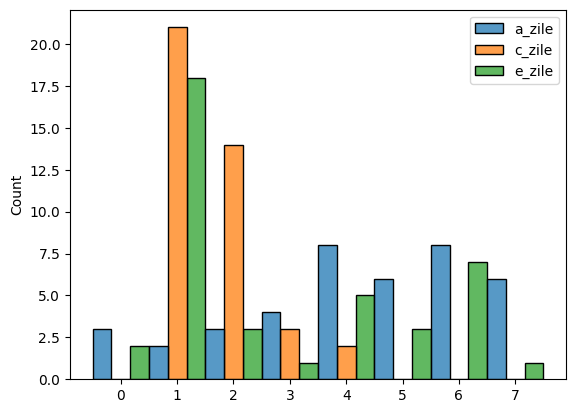

In [139]:
sns.histplot(data = q.loc[:,['a_zile', 'c_zile', 'e_zile']], discrete = True, stat = 'count', multiple="dodge")

<Axes: ylabel='Count'>

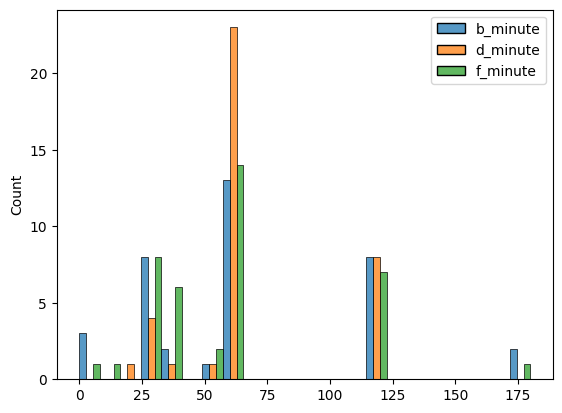

In [138]:
sns.histplot(data = q.loc[:,['b_minute', 'd_minute', 'f_minute']], stat = 'count', multiple="dodge")

<Axes: ylabel='Count'>

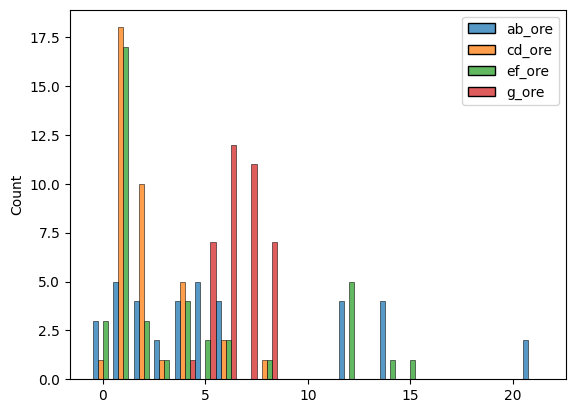

In [93]:
sns.histplot(data = q.loc[:,['ab_ore', 'cd_ore', 'ef_ore', 'g_ore']], stat = 'count', discrete = True, multiple="dodge")

In [200]:
vcountss['cd_ore'].iloc[:-1].astype(int)

cd_ore
0.333333     1
0.500000     4
0.833333     1
1.000000    12
1.333333     1
2.000000    10
3.000000     1
4.000000     5
6.000000     2
8.000000     1
Name: count, dtype: int32

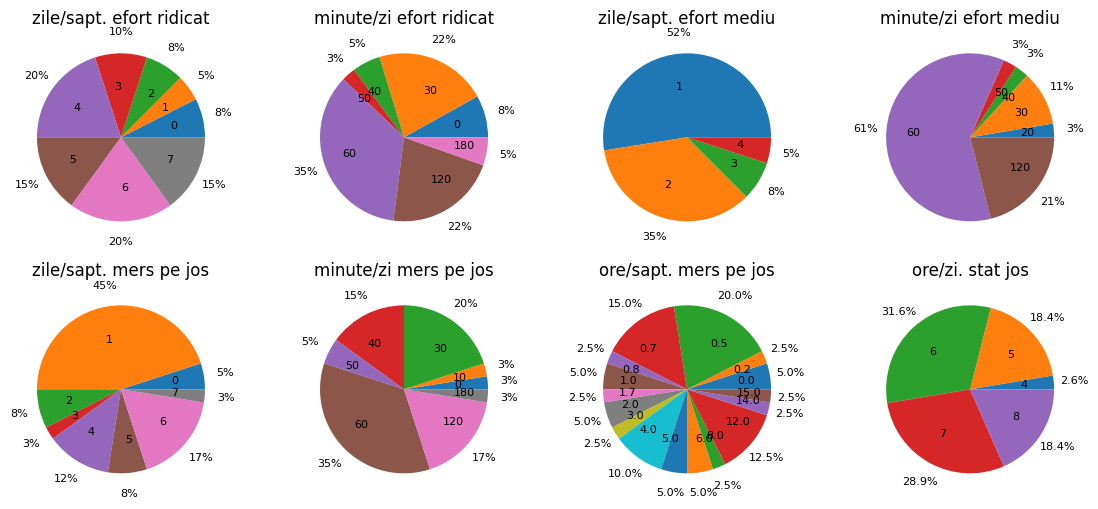

In [208]:
fig, ax = plt.subplots(2,4, figsize= (14,6))
ax[0,0].pie(vcountss['a_zile'], labels=vcountss['a_zile'].index, autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[0,0].set_title("zile/sapt. efort ridicat")
ax[0,1].pie(vcountss['b_minute'].iloc[:-1], labels=vcountss['b_minute'].iloc[:-1].index.astype(int), autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[0,1].set_title("minute/zi efort ridicat")
ax[0,2].pie(vcountss['c_zile'], labels=vcountss['c_zile'].index, autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[0,2].set_title("zile/sapt. efort mediu")
ax[0,3].pie(vcountss['d_minute'].iloc[:-1], labels=vcountss['d_minute'].iloc[:-1].index.astype(int), autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[0,3].set_title("minute/zi efort mediu")
ax[1,0].pie(vcountss['e_zile'], labels=vcountss['e_zile'].index, autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[1,0].set_title("zile/sapt. mers pe jos")
ax[1,1].pie(vcountss['f_minute'], labels=vcountss['f_minute'].index, autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[1,1].set_title("minute/zi mers pe jos")
# ax[1,2].pie(vcountss['g_minute'].iloc[:-1].astype(int), labels=vcountss['g_minute'].iloc[:-1].index.astype(int), autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
# ax[1,2].set_title("minute/zi stat jos")
# ax[1,3].pie(vcountss['ab_ore'], labels = vcountss['ab_ore'].index.round(1), autopct='%1.1f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
# ax[1,3].set_title("ore/sapt. efort ridicat")
# ax[2,0].pie(vcountss['cd_ore'], labels = vcountss['cd_ore'].index.round(1), autopct='%1.1f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
# ax[2,0].set_title("ore/sapt. efort mediu")
ax[1,2].pie(vcountss['ef_ore'], labels = vcountss['ef_ore'].index.round(1), autopct='%1.1f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[1,2].set_title("ore/sapt. mers pe jos")
ax[1,3].pie(vcountss['g_ore'].iloc[:-1], labels=vcountss['g_ore'].iloc[:-1].index.astype(int), autopct='%1.1f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[1,3].set_title("ore/zi. stat jos")

plt.show()

<Axes: xlabel='a_zile', ylabel='count'>

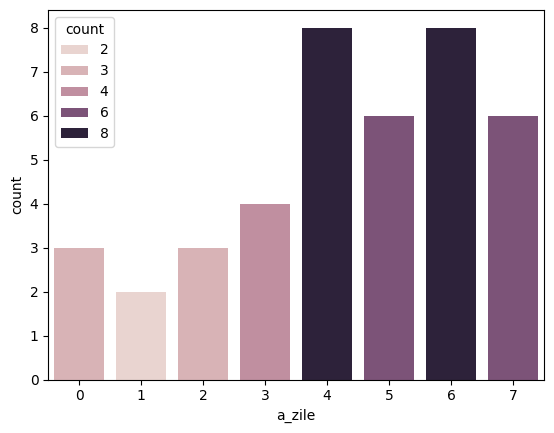

In [58]:
sns.barplot(vcountss['a_zile'].to_frame(), x = 'a_zile', y = 'count', hue = 'a_zile')

<Axes: xlabel='c_zile', ylabel='count'>

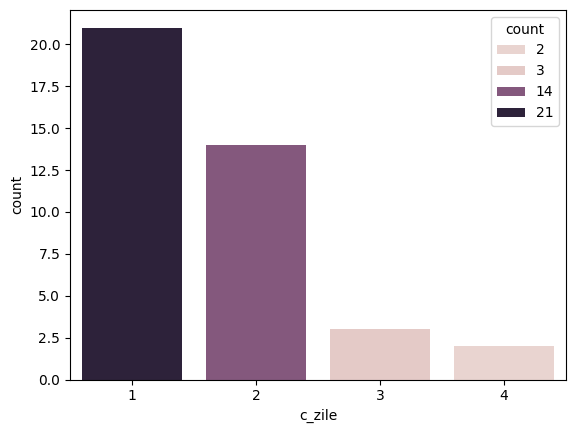

In [165]:
sns.barplot(vcountss['c_zile'].to_frame(), x = 'c_zile', y = 'count', hue = 'count')

<Axes: xlabel='e_zile', ylabel='count'>

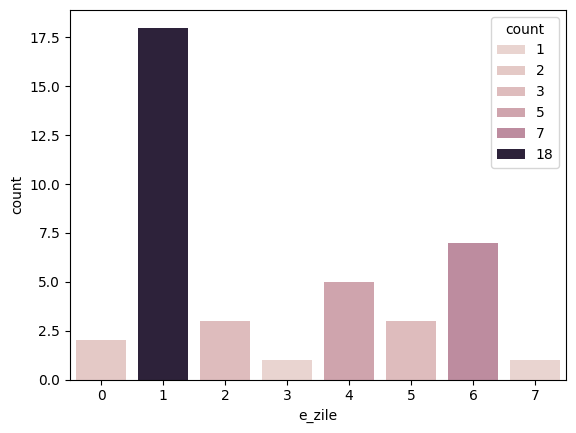

In [166]:
sns.barplot(vcountss['e_zile'].to_frame(), x = 'e_zile', y = 'count', hue = 'count')

In [108]:
qdn.corr(numeric_only = True)

,a_zile,b_minute,c_zile,d_minute,e_zile,f_minute,g_minute,ab_ore,cd_ore,ef_ore,g_ore
a_zile,1.000000,0.826591,0.680279,0.538283,0.673376,0.461200,0.004762,0.823255,0.605553,0.508439,0.004762
b_minute,0.826591,1.000000,0.714863,0.508607,0.575076,0.279411,0.231338,0.982764,0.670519,0.319117,0.231338
c_zile,0.680279,0.714863,1.000000,0.476974,0.699852,0.315704,0.173094,0.746413,0.852601,0.494873,0.173094
d_minute,0.538283,0.508607,0.476974,1.000000,0.245660,0.003837,0.132009,0.486191,0.817018,0.053092,0.132009
e_zile,0.673376,0.575076,0.699852,0.245660,1.000000,0.772751,-0.069578,0.595170,0.470612,0.894230,-0.069578
f_minute,0.461200,0.279411,0.315704,0.003837,0.772751,1.000000,-0.268723,0.247304,0.077229,0.938555,-0.268723
g_minute,0.004762,0.231338,0.173094,0.132009,-0.069578,-0.268723,1.000000,0.302190,0.242167,-0.239224,1.000000
ab_ore,0.823255,0.982764,0.746413,0.486191,0.595170,0.247304,0.302190,1.000000,0.687837,0.318332,0.302190
cd_ore,0.605553,0.670519,0.852601,0.817018,0.470612,0.077229,0.242167,0.687837,1.000000,0.232625,0.242167
ef_ore,0.508439,0.319117,0.494873,0.053092,0.894230,0.938555,-0.239224,0.318332,0.232625,1.000000,-0.239224


In [23]:
q.loc[:,['a_zile', 'c_zile', 'e_zile']].corr().style.background_gradient(cmap='RdYlGn')

,a_zile,c_zile,e_zile
a_zile,1.000000,0.679865,0.665004
c_zile,0.679865,1.000000,0.728404
e_zile,0.665004,0.728404,1.000000
